In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
data = pd.get_dummies(data,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [7]:
fc = data.pop('HeartDisease')
data.insert(len(list(data)),'HeartDisease',fc)
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
914,68,144,193,1,141,3.4,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
915,57,130,131,0,115,1.2,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
916,57,130,236,0,174,0.0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(734, 20) (184, 20) (734,) (184,)


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [11]:
from sklearn import tree

# Entropy

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [13]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
y_pred = clf.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,log_loss
accuracy = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)
print("Accuracy Score: %0.2f"%(accuracy*100))
print("Precision Score: %0.2f"%(prec*100))
print("Recall Score: %0.2f"%(recall*100))
print("F1 Score: %0.2f"%(f1_score*100))

Accuracy Score: 77.17
Precision Score: 84.21
Recall Score: 74.77
F1 Score: 79.21


[Text(0.5345643939393939, 0.9666666666666667, 'X[19] <= 0.135\nentropy = 0.994\nsamples = 734\nvalue = [333, 401]'),
 Text(0.29261363636363635, 0.9, 'X[8] <= -0.066\nentropy = 0.659\nsamples = 416\nvalue = [71, 345]'),
 Text(0.1553030303030303, 0.8333333333333334, 'X[6] <= 0.708\nentropy = 0.942\nsamples = 128\nvalue = [46, 82]'),
 Text(0.07828282828282829, 0.7666666666666667, 'X[4] <= -0.28\nentropy = 0.823\nsamples = 101\nvalue = [26, 75]'),
 Text(0.020202020202020204, 0.7, 'X[4] <= -0.925\nentropy = 0.371\nsamples = 42\nvalue = [3, 39]'),
 Text(0.010101010101010102, 0.6333333333333333, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.030303030303030304, 0.6333333333333333, 'X[4] <= -0.866\nentropy = 0.529\nsamples = 25\nvalue = [3, 22]'),
 Text(0.020202020202020204, 0.5666666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.04040404040404041, 0.5666666666666667, 'X[1] <= -0.111\nentropy = 0.414\nsamples = 24\nvalue = [2, 22]'),
 Text(0.030303030303030304, 0.5

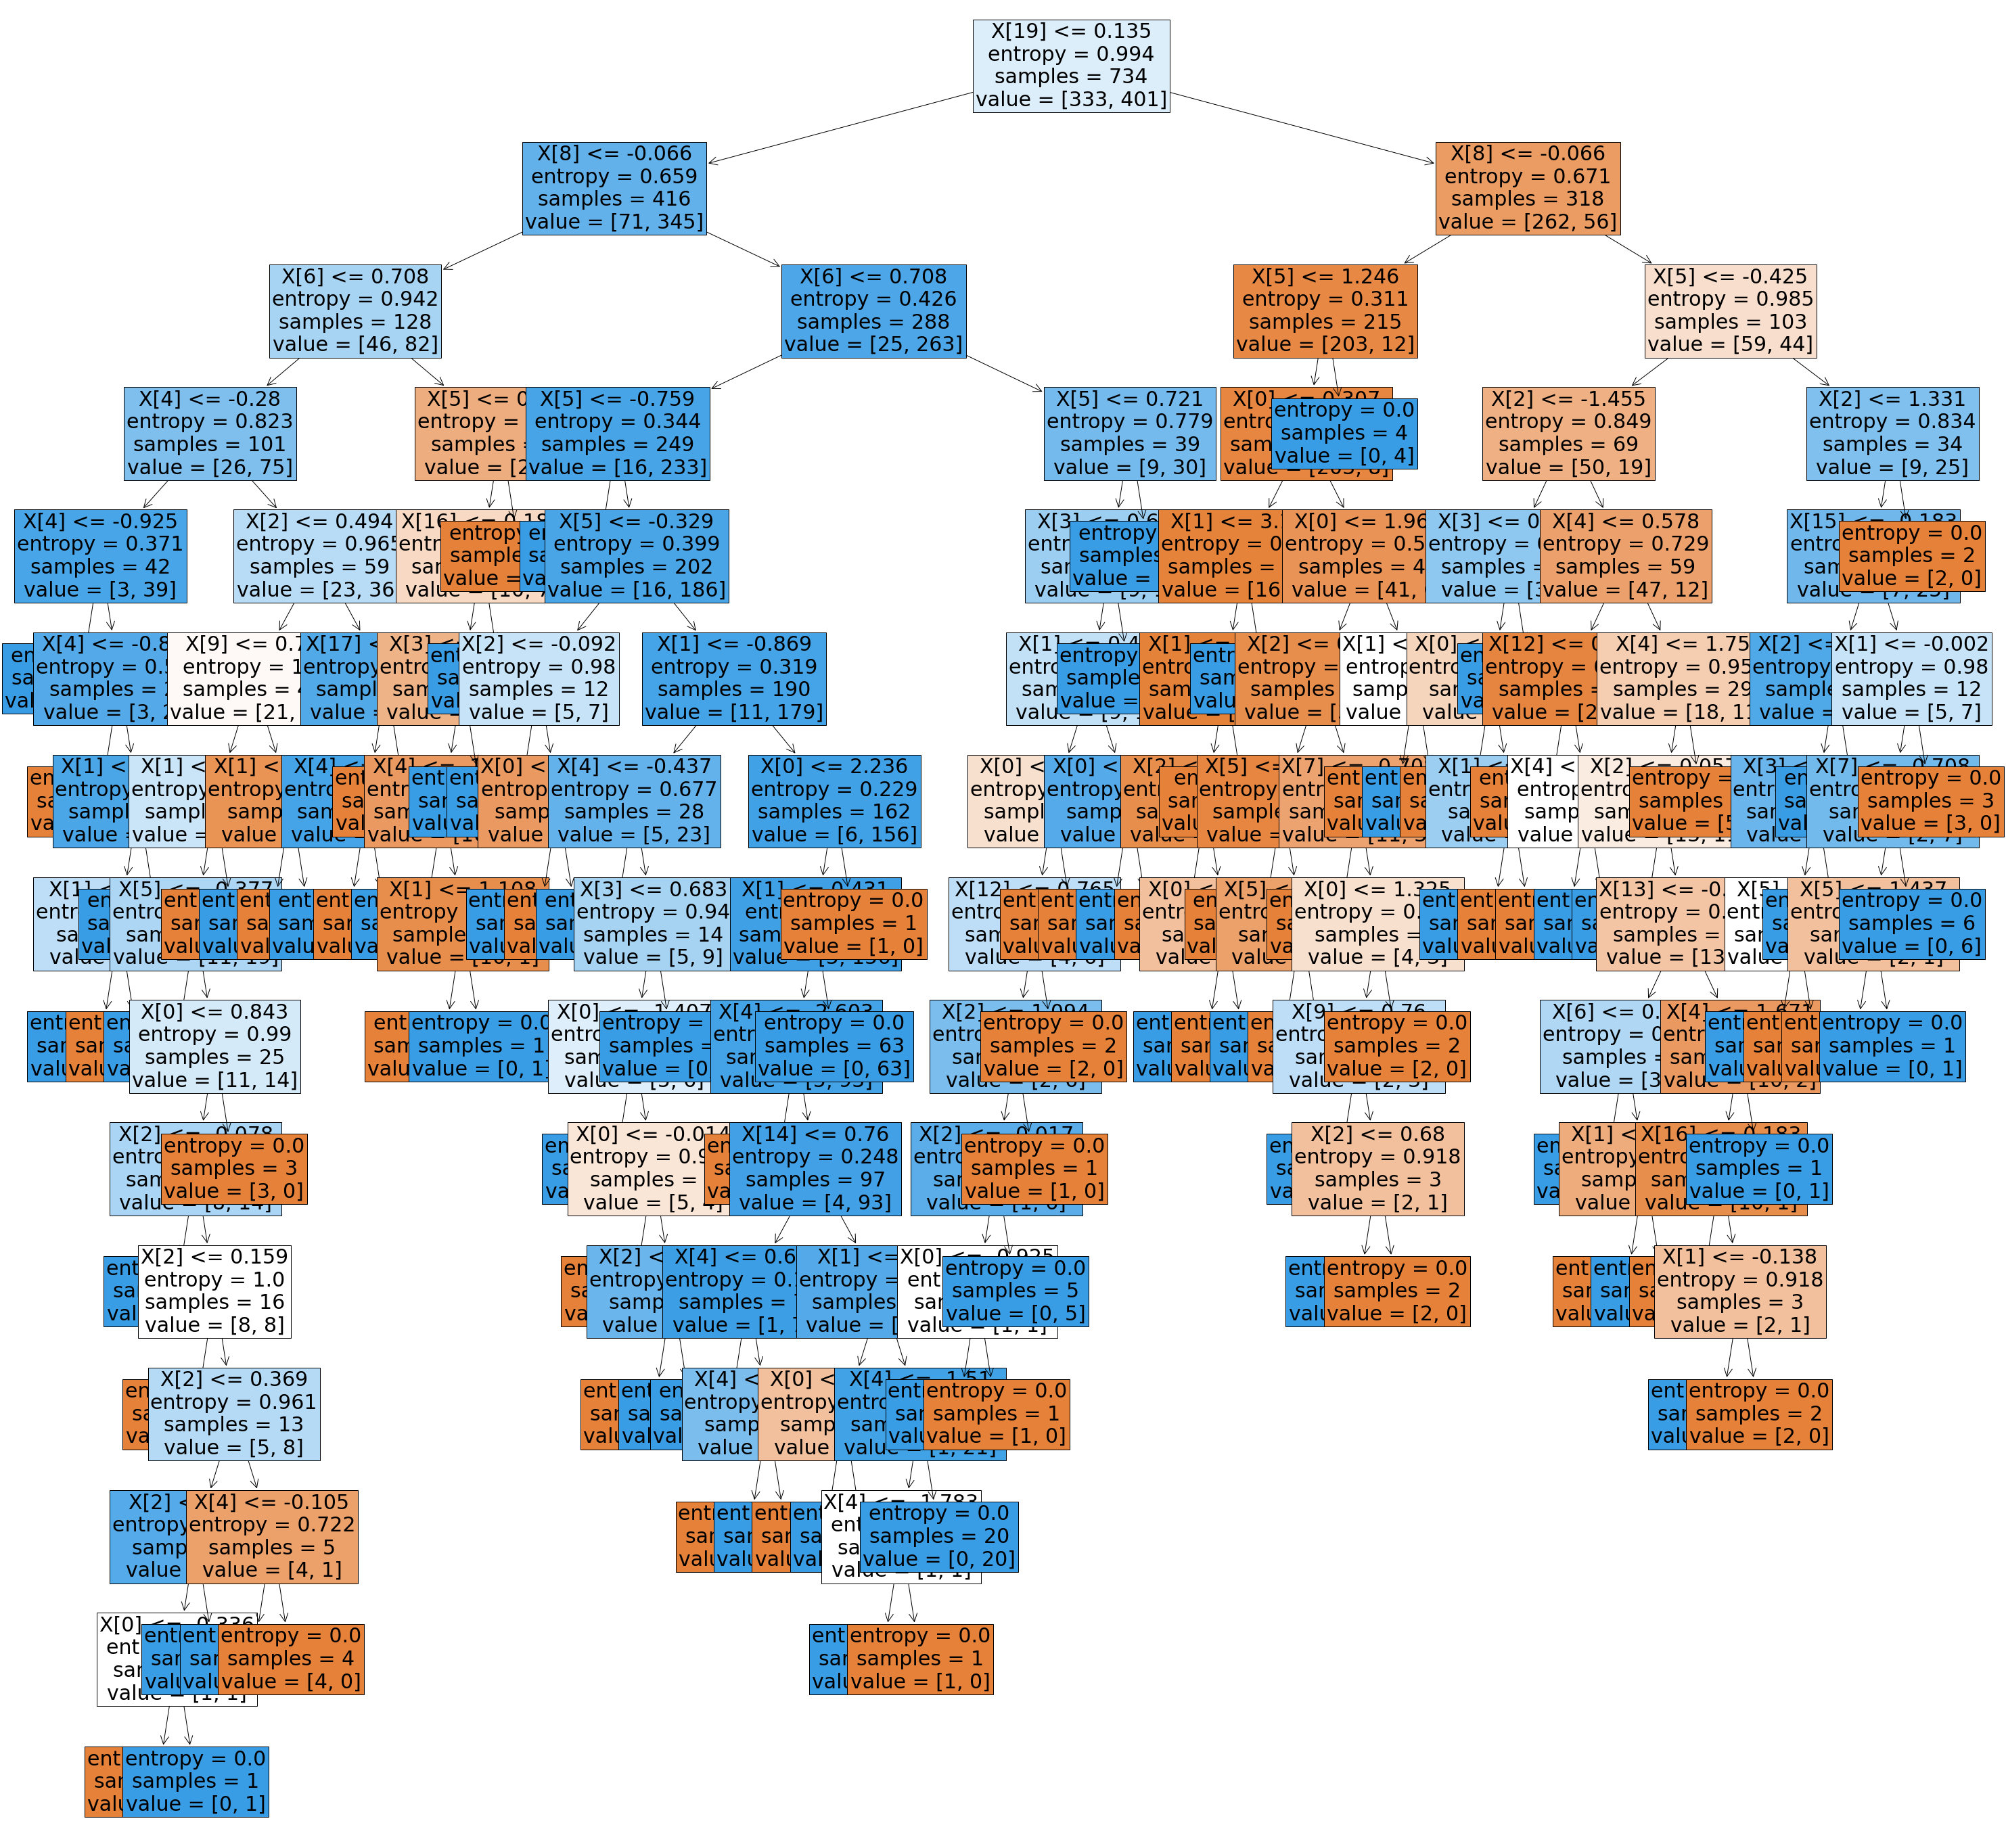

In [26]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(50,50))
tree.plot_tree(clf,fontsize=30,filled=True)

# GINI

In [28]:
gini_clf = tree.DecisionTreeClassifier(criterion='gini')

In [29]:
gini_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
gini_y_pred = clf.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,log_loss
accuracy = accuracy_score(y_test,gini_y_pred)
prec = precision_score(y_test,gini_y_pred)
recall = recall_score(y_test,gini_y_pred)
f1_score = f1_score(y_test,gini_y_pred)
print("Accuracy Score: %0.2f"%(accuracy*100))
print("Precision Score: %0.2f"%(prec*100))
print("Recall Score: %0.2f"%(recall*100))
print("F1 Score: %0.2f"%(f1_score*100))

Accuracy Score: 77.17
Precision Score: 84.21
Recall Score: 74.77
F1 Score: 79.21


[Text(0.5682488207547169, 0.9705882352941176, 'X[19] <= 0.135\ngini = 0.496\nsamples = 734\nvalue = [333, 401]'),
 Text(0.36939858490566035, 0.9117647058823529, 'X[4] <= 0.559\ngini = 0.283\nsamples = 416\nvalue = [71, 345]'),
 Text(0.24233490566037735, 0.8529411764705882, 'X[6] <= 0.708\ngini = 0.199\nsamples = 348\nvalue = [39, 309]'),
 Text(0.1403301886792453, 0.7941176470588235, 'X[1] <= -2.522\ngini = 0.145\nsamples = 306\nvalue = [24, 282]'),
 Text(0.13089622641509435, 0.7352941176470589, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.14976415094339623, 0.7352941176470589, 'X[8] <= -0.066\ngini = 0.139\nsamples = 305\nvalue = [23, 282]'),
 Text(0.08962264150943396, 0.6764705882352942, 'X[4] <= -0.28\ngini = 0.262\nsamples = 71\nvalue = [11, 60]'),
 Text(0.05660377358490566, 0.6176470588235294, 'X[2] <= 1.099\ngini = 0.133\nsamples = 42\nvalue = [3, 39]'),
 Text(0.03773584905660377, 0.5588235294117647, 'X[16] <= 0.183\ngini = 0.095\nsamples = 40\nvalue = [2, 38]'),
 Text(0.02

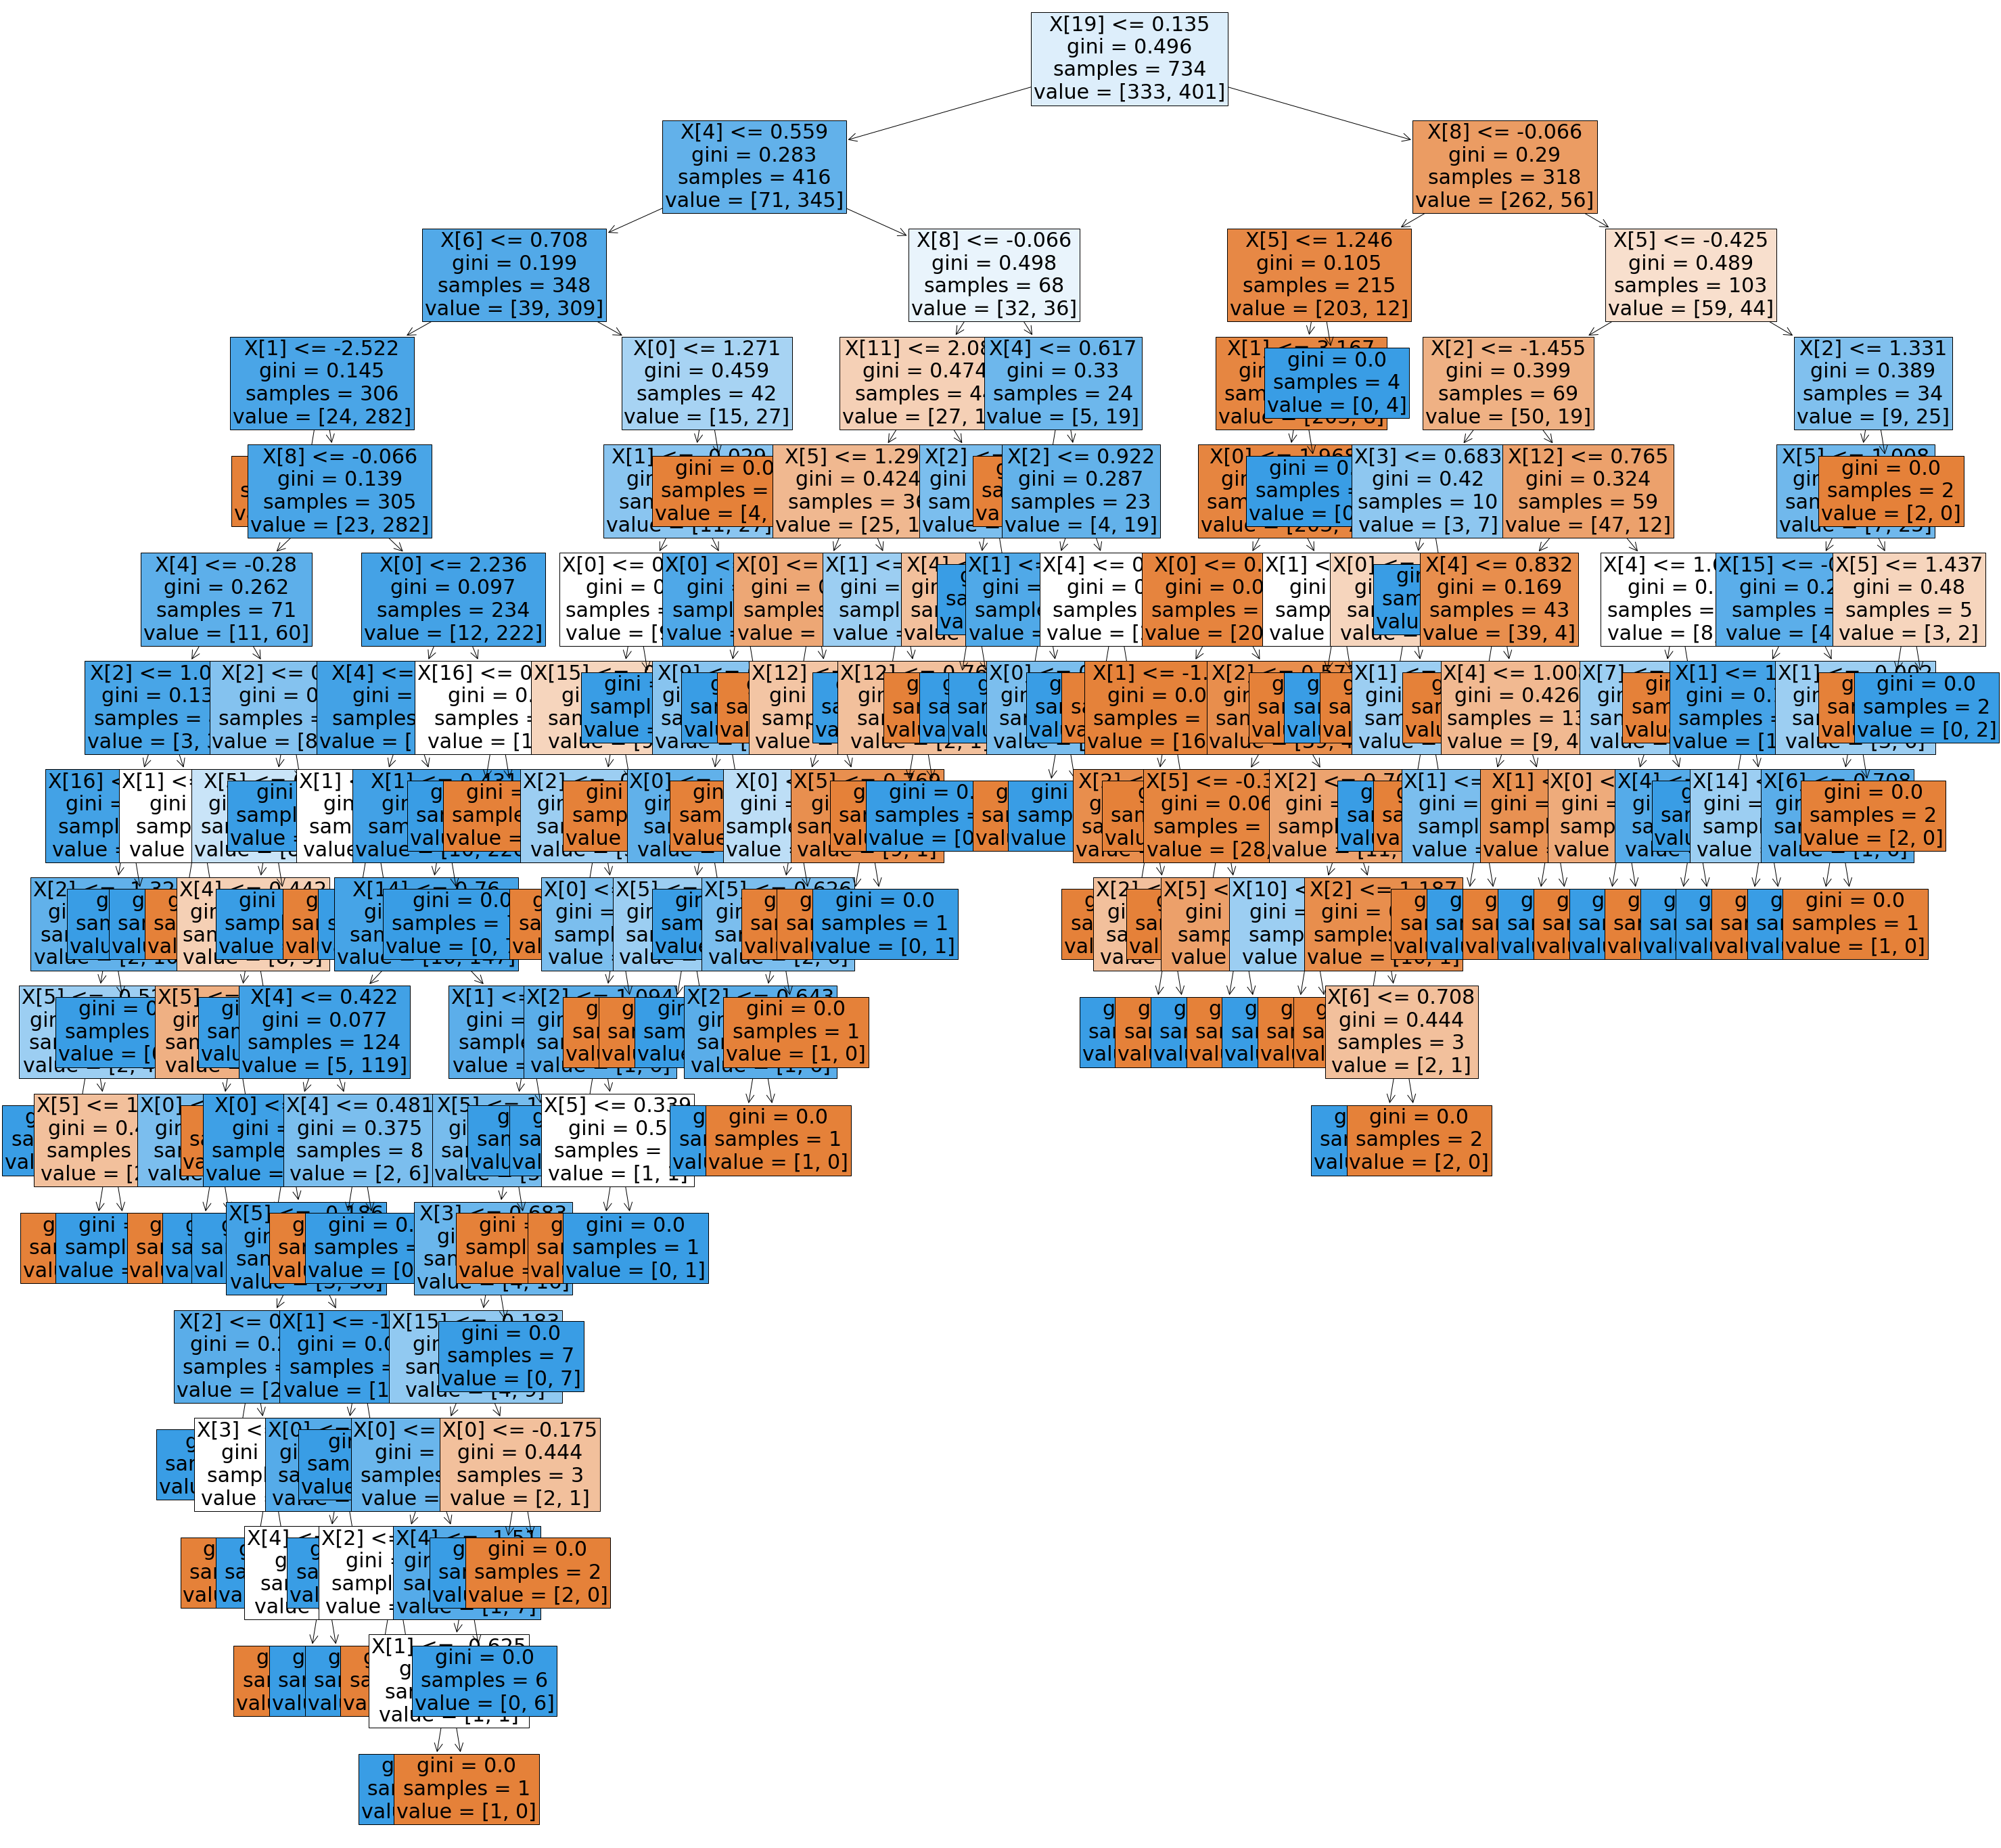

In [35]:
fig = plt.figure(figsize=(50,50))
tree.plot_tree(gini_clf,fontsize=30,filled=True)